In [1569]:
from google.colab import drive #importing drive 
drive.mount("/content/drive") #mounting content in google collab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1570]:
path="/content/drive/MyDrive/FINAL ML PROJECT/car data NEW.csv" #path for the desired file from  google Drive
path1="/content/drive/MyDrive/FINAL ML PROJECT/CarPrice_Assignment_forknn.csv"#path for the desired file from  google Drive

# **Car Value Prediction**
**Krishna Nayak**  203001170003

**Ranit Sarkar**  203001170011

**Krisnendu Mity**  203001170015

**Shwetaketu Das**  203001170020

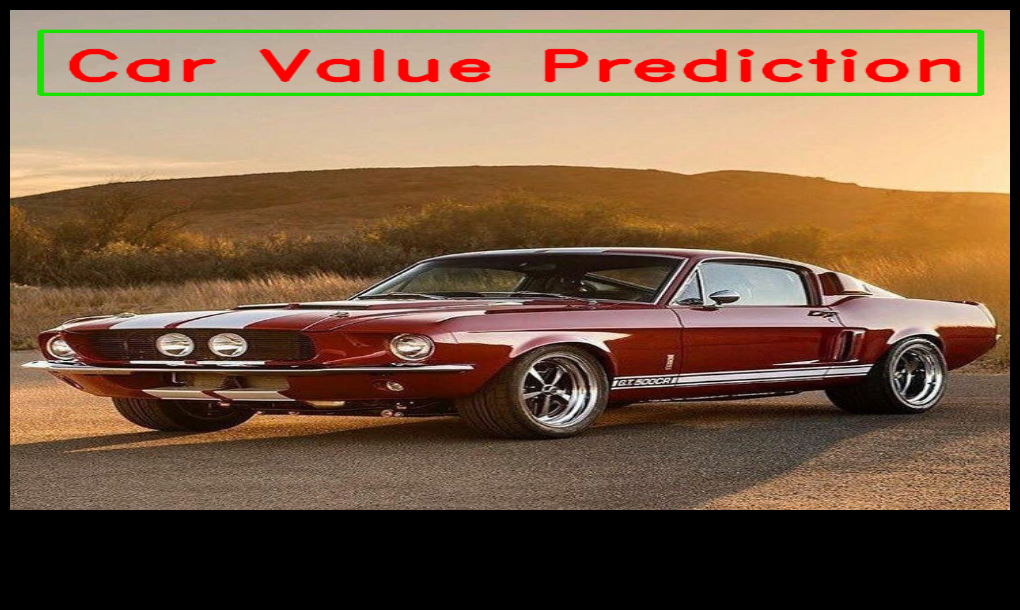

In [1571]:
import numpy as np #importing numnpy library
import cv2 #importing computer vision 2
from google.colab.patches import cv2_imshow #cv2 imshow helps to view the picture
# path
# Reading an image in default mode
image = cv2.imread("/content/drive/MyDrive/FINAL ML PROJECT/WhatsApp Image 2021-07-05 at 9.26.32 PM.jpeg",cv2.IMREAD_COLOR) #path of image
# font
font = cv2.FONT_HERSHEY_DUPLEX #font type
org = (40, 100) #position from top left corner
fontScale = 2 #font
color = (0,0,255) #BGR 
thickness = 4 #thickness of font
image = cv2.putText(image, 'Car Value Prediction', org, font,
fontScale, color, thickness, cv2.LINE_AA) #LINE_AA 
cv2.rectangle(image,(22,30),(714,120),(0,225,25),3) #22=breath from west 30=top side from north 714=breadth from west 120=bottom side from north
# Displaying the image
adj= cv2.resize(image, (1000,500)) #resize the image breadth, height
adj= cv2.copyMakeBorder(adj, 10, 100, 10, 10, cv2.BORDER_CONSTANT) #Border (East, West, North, South)
cv2_imshow(adj) 

In [1572]:
print(image.shape) #(breadth, length , color=BGR)

(714, 736, 3)


# **Importing libraries**

In [1573]:
#import packages 
import pandas as pd #importing panda 
import numpy as np #importing numpy
from matplotlib import pyplot as plt #importing pyplot from matplotlib
import seaborn as sns #importing seaborn
from numpy import math #importing math from numpy

# **importing csv**

In [1574]:
mcsv=pd.read_csv(path) #assigning veriable for imported CSV
mcsv.head() #print

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Company
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Audi
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Audi
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Audi
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Audi
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Audi


# **Preprocessing the dataset**

In [1575]:
rows, col=mcsv.shape #assign veriables to the shape funcation 
print("Rows : %s, column : %s" % (rows,col) ) #print the number of rows and columns 

Rows : 498, column : 10


In [1576]:
print(mcsv.columns) #prints the name of the columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Company'],
      dtype='object')


In [1577]:
mcsv.dtypes #shows the type of data types present

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
Company           object
dtype: object

In [1578]:
mcsv.info() #information of the data present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       498 non-null    object 
 1   Year           498 non-null    int64  
 2   Selling_Price  497 non-null    float64
 3   Present_Price  498 non-null    float64
 4   Kms_Driven     498 non-null    int64  
 5   Fuel_Type      498 non-null    object 
 6   Seller_Type    496 non-null    object 
 7   Transmission   498 non-null    object 
 8   Owner          498 non-null    int64  
 9   Company        498 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 39.0+ KB


# **Quality of the data in dataset**
The dataset has 498 rows and 10 columns but some columns has
496 and 497 entries thus there are null values.

Columns such as Car_Name , Fuel_Type , Seller_Type , Transmission and Company have dtypes objects - needs to be converted to int


             

In [1579]:
mcsv.isnull().any() #check any null value present or not

Car_Name         False
Year             False
Selling_Price     True
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type       True
Transmission     False
Owner            False
Company          False
dtype: bool

In [1580]:
mcsv.dropna(inplace= True) #default returns a new dataset without NaN values.

In [1581]:
mcsv.isnull().any() #check any null value present or not after using dropna funcation.

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
Company          False
dtype: bool

In [1582]:
mcsv.shape #check rows and columns after removing null values

(495, 10)

In [1583]:
#get dummies
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #importing LebelEncoder from sklearn preprocessing
labelencoder = LabelEncoder() #assingning veriable for labelencoder
mcsv["Car_Name"] = labelencoder.fit_transform(mcsv["Car_Name"]) #label encoder used to convert objects into dummies 
mcsv["Fuel_Type"] = labelencoder.fit_transform(mcsv["Fuel_Type"])  #label encoder used to convert objects into dummies
mcsv["Seller_Type"] = labelencoder.fit_transform(mcsv["Seller_Type"])  #label encoder used to convert objects into dummies
mcsv["Transmission"] = labelencoder.fit_transform(mcsv["Transmission"])  #label encoder used to convert objects into dummies
mcsv["Company"] = labelencoder.fit_transform(mcsv["Company"])  #label encoder used to convert objects into dummies

In [1584]:
mcsv.describe() #summarize the data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Company
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,67.309091,2013.682828,5.136606,8.286343,38603.349495,1.717172,0.220202,0.848485,0.042424,1.848485
std,22.190275,2.936992,4.534891,7.388251,26466.678616,0.485423,0.414802,0.358913,0.229897,1.349491
min,0.000000,2003.000000,0.170000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,2012.000000,2.250000,4.150000,18914.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,68.000000,2015.000000,4.500000,7.700000,37000.000000,2.000000,0.000000,1.000000,0.000000,2.000000
75%,83.000000,2016.000000,7.125000,10.000000,49998.000000,2.000000,0.000000,1.000000,0.000000,3.000000
max,96.000000,2018.000000,35.000000,92.600000,197176.000000,2.000000,1.000000,1.000000,3.000000,4.000000


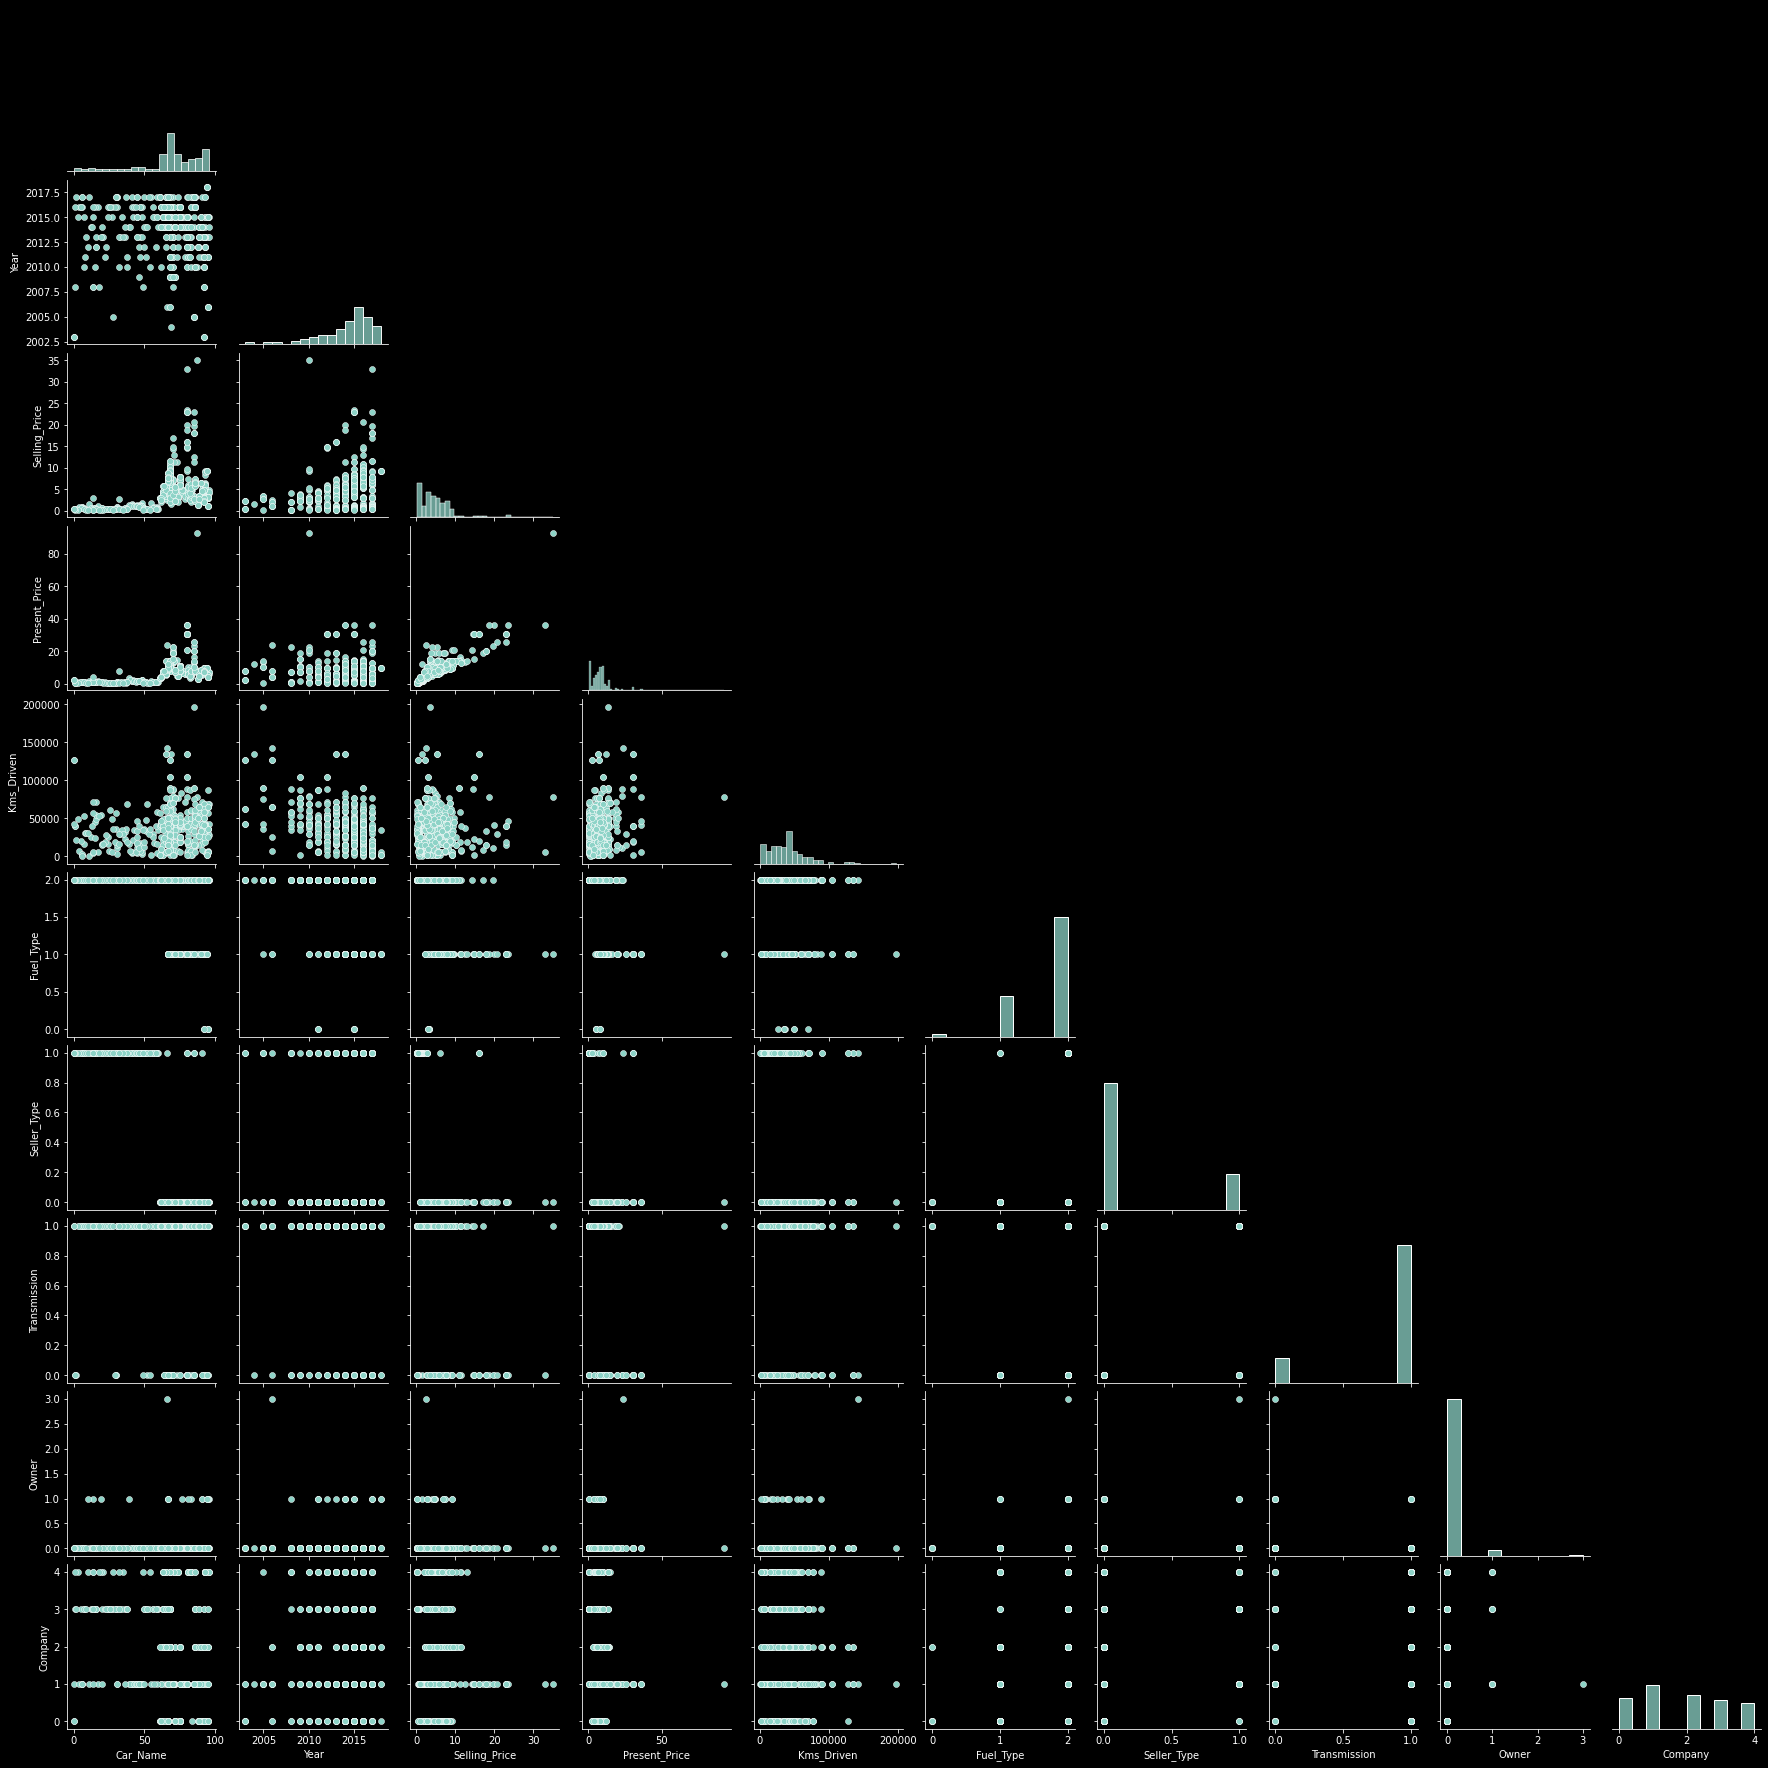

In [1585]:
sns.pairplot(mcsv, corner=True) #to veiw relation bettween data in a dataset

In [1586]:
corr=mcsv.corr() #corelation of datas in dataset 
print(corr) #print correlation

               Car_Name      Year  ...     Owner   Company
Car_Name       1.000000 -0.048593  ...  0.012503 -0.167768
Year          -0.048593  1.000000  ... -0.045988  0.057822
Selling_Price  0.396654  0.306381  ... -0.039258 -0.140261
Present_Price  0.398001 -0.011872  ...  0.005800 -0.175764
Kms_Driven     0.131486 -0.464184  ...  0.068396 -0.073297
Fuel_Type     -0.339533 -0.126942  ...  0.017040  0.246558
Seller_Type   -0.782416 -0.060530  ...  0.050432  0.135665
Transmission  -0.062225 -0.057203  ... -0.240870  0.073709
Owner          0.012503 -0.045988  ...  1.000000  0.046860
Company       -0.167768  0.057822  ...  0.046860  1.000000

[10 rows x 10 columns]


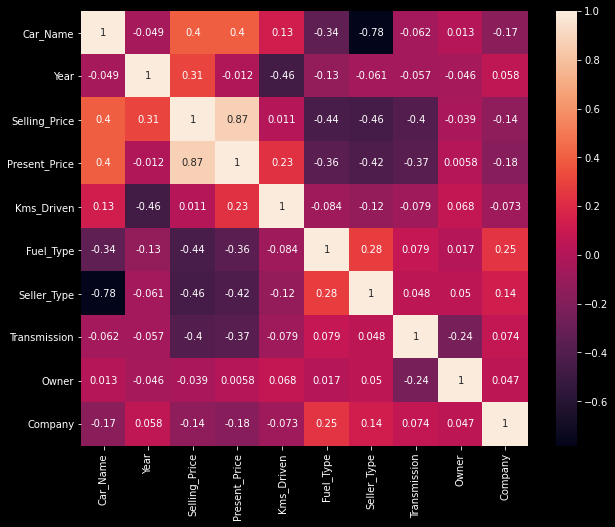

In [1587]:
 plt.figure(figsize=(10,8)) #assigning fig size for plt
sns.heatmap(corr, annot=True ) #heatmap for visualisation of the corelation of data 

In [1588]:
mcsv['Year'].value_counts()#counts the number of values present

2015    114
2016     82
2014     71
2017     51
2013     46
2012     29
2011     28
2010     23
2009     16
2008      9
2006      8
2005      6
2003      6
2018      5
2004      1
Name: Year, dtype: int64

In [1589]:
Training_Accuracy=[] #create empty list to store traning accuracy
Testing_Accuracy=[] #create empty list to store testing accuracy
model=[] #create empty list to store modelling name
from sklearn import metrics #import matrices 
from sklearn.metrics import confusion_matrix, accuracy_score #import accuracy score

# **SIMPLE LINEAR REGRESSION**

In [1590]:
mcsv.head() #print csv

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Company
0,89,2014,3.35,5.59,27000,2,0,1,0,0
1,92,2013,4.75,9.54,43000,1,0,1,0,0
2,67,2017,7.25,9.85,6900,2,0,1,0,0
3,95,2011,2.85,4.15,5200,2,0,1,0,0
4,91,2014,4.60,6.87,42450,1,0,1,0,0


In [1591]:
X=mcsv.iloc[:,2:3] #[row,column start number: column end number(n-1)] extracting columns from mcsv and storing in y (labels)
y=mcsv.iloc[:,3:4] #storing "Present_Price" column in X

In [1592]:
y.head() #print labels

,Present_Price
0,5.59
1,9.54
2,9.85
3,4.15
4,6.87


In [1593]:
X.head() #print features

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


## **Training the Simple Linear Regression model on the dataset**

In [1594]:
from sklearn.model_selection import train_test_split #importing train_test_split from sklearn.preprocessing
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, train_size=0.8,test_size = 0.2, random_state=6) #assigned testsize and trainsize

In [1595]:
from sklearn.preprocessing import StandardScaler #importing StandardScaler from sklearn.preprocessing
sc_x= StandardScaler() #assigning veriable for standredscalar funcation 
X_Train=sc_x.fit_transform(X_Train) #transforming X_train using standered scaler and storing it in x_train
X_Test=sc_x.transform(X_Test) #transforming X_test using standered scaler and storing it in x_test

In [1596]:
from sklearn.linear_model import LinearRegression #importing LinearRegression from sklearn.linear_model 
regressor = LinearRegression() #assigning veriable for LinearRegression funcation
regressor.fit(X_Train, y_Train) #taining the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1597]:
y_Pred = regressor.predict(X_Test) #predicting the y value

In [1598]:
from sklearn.metrics import mean_squared_error,r2_score #importing packages to check ac
print("mean squared error",mean_squared_error(y_Test,y_Pred)) #mean square error
print("root square",r2_score(y_Test,y_Pred)) #r2_score = regression score wether the da
math.sqrt(mean_squared_error(y_Test,y_Pred)) #square root of mean square error

mean squared error 6.833250067906958
root square 0.8653205464327518


2.614048597082112

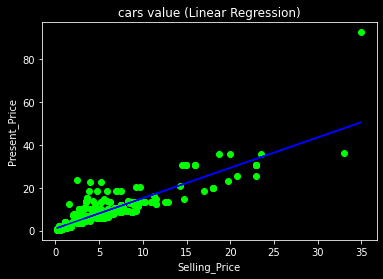

In [1599]:
plt.scatter(X, y, color = 'lime') # scatter plot of *y* vs. *x* with varying marker size and/or color.
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('cars value (Linear Regression)')#Set a title for the axes.
plt.xlabel('Selling_Price') #Set a title for the x axis.
plt.ylabel('Present_Price')#Set a title for the y axis.
plt.show()#display allfigures 





# **MULTILINEAR REGRESSION**

In [1600]:
y=mcsv.iloc[:,2:3] #[row,column start number: column end number(n-1)] extracting columns from mcsv and storing in y (labels)
x = mcsv.drop(list(y.columns), axis=1) #removing the extracted column from mcsv and storing it in x (features)

In [1601]:
x.head() #features

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Company
0,89,2014,5.59,27000,2,0,1,0,0
1,92,2013,9.54,43000,1,0,1,0,0
2,67,2017,9.85,6900,2,0,1,0,0
3,95,2011,4.15,5200,2,0,1,0,0
4,91,2014,6.87,42450,1,0,1,0,0


In [1602]:
y.head() #label

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


## **Training the multilinear Regression model on the dataset**

In [1603]:
from sklearn.model_selection import train_test_split #importing train_test_split from sklearn.preprocessing
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, train_size=0.8,test_size = 0.2, random_state=41) #assigned testsize and trainsize

In [1604]:
from sklearn.linear_model import LinearRegression #importing LinearRegression from sklearn.linear_model 
regressor = LinearRegression() #assigning veriable for LinearRegression funcation
regressor.fit(x_Train, y_Train) #taining the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1605]:
y_pred = regressor.predict(x_Test) #predicting the y value

In [1606]:
print(regressor.coef_) #coeficient (m) of the regression y=mx+c

[[-8.40089528e-04  3.93259946e-01  4.74412765e-01 -1.25516650e-05
  -9.60720127e-01 -1.01606772e+00 -1.17146936e+00 -8.99083353e-01
   6.73203407e-02]]


In [1607]:
print(regressor.intercept_) #value where the regression intercepted 

[-787.38126615]


In [1608]:
from sklearn.metrics import mean_squared_error,r2_score #importing packages to check accuracy
print("mean squared error",mean_squared_error(y_Test,y_pred)) #mean square error
print("root square",r2_score(y_Test,y_pred)) #r2_score = regression score wether the data is perfectly corelated or not
math.sqrt(mean_squared_error(y_Test,y_pred)) #square root of mean square error

mean squared error 1.2173542684645338
root square 0.9249109875020165


1.1033377852972017

# **POLYNOMIAL REGRESSION**

In [1609]:
X = mcsv.loc[:,["Selling_Price"]] #extract features
Y = mcsv.loc[:,["Present_Price"]] #extract labels

In [1610]:
from sklearn.linear_model import LinearRegression #importing linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, Y) #fit traning

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Training the Linear Regression model on the dataset**

In [1611]:
from sklearn.model_selection import train_test_split #importing train_test_split from sklearn.preprocessing
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, train_size=0.75,test_size = 0.25, random_state=0) #assigned testsize and trainsize

## **Training the Polynomial Regression model on the specified dataset**

In [1612]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) #drgree 4 polynomial regression
X_poly = poly_reg.fit_transform(X) #fit training
lin_reg_2 = LinearRegression() #LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
lin_reg_2.fit(X_poly, Y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Visualising the Polynomial Regression results**

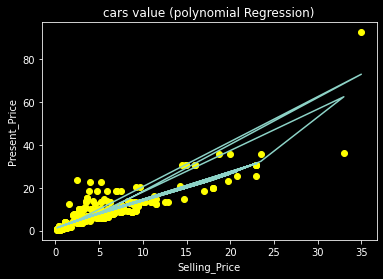

In [1613]:
plt.scatter(X, Y, color = 'yellow') # scatter plot of *y* vs. *x* with varying marker size and/or color.
plt.plot(X, lin_reg_2.predict(X_poly)) #line plot
plt.title('cars value (polynomial Regression)')
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')
plt.show()

## **Visualising the Linear Regression results**

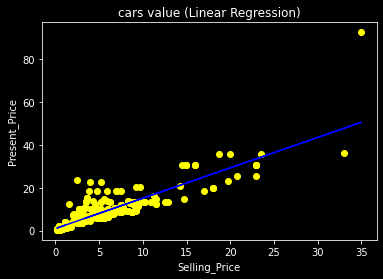

In [1614]:
plt.scatter(X, Y, color = 'yellow') # scatter plot of *y* vs. *x* with varying marker size and/or color.
plt.plot(X, lin_reg.predict(X), color = 'blue') #lineplot
plt.title('cars value (Linear Regression)')#Set a title for the axes.
plt.xlabel('Selling_Price') #Set a title for the x axis.
plt.ylabel('Present_Price')#Set a title for the y axis.
plt.show()#display allfigures 

# **Predicting a new result with Linear Regression**

In [1615]:
lin_reg.predict([[6.5]]) #Returns predicted values.

array([[10.21862868]])

# **Predicting a new result with Polynomial Regression**

In [1616]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))#Fit to data, then transform it.

array([[10.18736846]])

# **Decision Tree Regression**

csv

In [1617]:
mcsv.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Company
0,89,2014,3.35,5.59,27000,2,0,1,0,0
1,92,2013,4.75,9.54,43000,1,0,1,0,0
2,67,2017,7.25,9.85,6900,2,0,1,0,0
3,95,2011,2.85,4.15,5200,2,0,1,0,0
4,91,2014,4.60,6.87,42450,1,0,1,0,0


In [1618]:
ff=mcsv.iloc[:,[4,5,6]] #features
ll=mcsv.iloc[:,[-1]] #labels

In [1619]:
ff.head() #print features

,Kms_Driven,Fuel_Type,Seller_Type
0,27000,2,0
1,43000,1,0
2,6900,2,0
3,5200,2,0
4,42450,1,0


In [1620]:
ll.head() #print labels

,Company
0,0
1,0
2,0
3,0
4,0


In [1621]:
from sklearn.model_selection import train_test_split #importing train_test_split from sklearn.preprocessing
ff_Train, ff_Test, ll_Train, ll_Test = train_test_split(ff, ll, train_size=0.75,test_size = 0.25, random_state=0) #assigned testsize and trainsize

# Training the Decision Tree Regression model on the whole dataset

In [1622]:
from sklearn.tree import DecisionTreeRegressor
DRregressor = DecisionTreeRegressor(random_state = 0)
DRregressor.fit(ff_Train, ll_Train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

# Predicting a new result

In [1623]:
DRregressor.predict([[27000,2,1]])

array([3.])

# **LOGISTIC REGRESSION**

In [1624]:
mcsv.head()#his function returns the first n rows for the object based on position

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Company
0,89,2014,3.35,5.59,27000,2,0,1,0,0
1,92,2013,4.75,9.54,43000,1,0,1,0,0
2,67,2017,7.25,9.85,6900,2,0,1,0,0
3,95,2011,2.85,4.15,5200,2,0,1,0,0
4,91,2014,4.60,6.87,42450,1,0,1,0,0


In [1625]:
yy=mcsv.iloc[:,[4]] #[row,column start number: column end number(n-1)] extracting columns from mcsv and storing in y (labels)
xx= mcsv.iloc[:,[0,1,2,3]] #removing the extracted column from mcsv and storing it in x (features)

## **Training the logistic Regression model on the dataset**

In [1626]:
from sklearn.model_selection import train_test_split #importing train_test_split from sklearn.preprocessing
xx_Train, xx_Test, yy_Train, yy_Test = train_test_split(xx, yy, train_size=0.7,test_size = 0.3, random_state=0) #assigned testsize and trainsize

In [1627]:
from sklearn.linear_model import LogisticRegression #importing logistic regression
from sklearn import metrics #import matrices
logreg = LogisticRegression() #classifier.
logreg.fit(xx_Train, yy_Train) #  Fitted estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1628]:
x_pred = logreg.predict(xx_Train) #predicting x values based on traning features
y_pred = logreg.predict(xx_Test) #predicting y values based on x_test
Training_Accuracy.append(metrics.accuracy_score(yy_Train, x_pred))#add traning accuracy to the list
Testing_Accuracy.append(metrics.accuracy_score(yy_Test, y_pred))#add testing accuracy to the list
model.append('LogisticRegression')#add the specified name
print("Training Accuracy:",metrics.accuracy_score(yy_Train, x_pred)) #print traning accuracy
print("Testing Accuracy:",metrics.accuracy_score(yy_Test, y_pred))#print testing accuracy

Training Accuracy: 0.06936416184971098
Testing Accuracy: 0.03355704697986577


# **KNN CLASSIFIER**

In [1629]:
kcsv=pd.read_csv(path1)
kcsv.head()

,CarName,wheelbase,carlength,carwidth,carheight,curbweight,doornumber,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,Audi,93.7,156.9,63.4,53.7,2050,2,4,97,3.62,2.36,9.0,69,4900,31,36,5118.0
1,Audi,88.4,141.1,60.3,53.2,1488,2,3,61,2.91,3.03,9.5,48,5100,47,53,5151.0
2,Audi,93.1,159.1,64.2,54.1,1890,2,4,91,3.03,3.15,9.0,68,5000,30,31,5195.0
3,Audi,95.7,158.7,63.6,54.5,1985,2,4,92,3.05,3.03,9.0,62,4800,35,39,5348.0
4,Audi,93.7,157.3,64.4,50.8,1918,2,4,92,2.97,3.23,9.4,68,5500,37,41,5389.0


In [1630]:
kcsv.isnull().any() #check any null value present or not

CarName             False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
doornumber          False
cylindernumber      False
enginesize          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [1631]:
kcsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   doornumber        205 non-null    int64  
 7   cylindernumber    205 non-null    int64  
 8   enginesize        205 non-null    int64  
 9   boreratio         205 non-null    float64
 10  stroke            205 non-null    float64
 11  compressionratio  205 non-null    float64
 12  horsepower        205 non-null    int64  
 13  peakrpm           205 non-null    int64  
 14  citympg           205 non-null    int64  
 15  highwaympg        205 non-null    int64  
 16  price             205 non-null    float64
dt

In [1632]:
#get dummies
cat=kcsv.select_dtypes(include=['object']) #segregating the dtypes objrct from dataset
cars_dummies = pd.get_dummies(cat) #creating dummies
kcsv = kcsv.drop(list(cat.columns), axis=1) #removing the ojects columns
kcsv = pd.concat([kcsv, cars_dummies], axis=1) #merging the dummies with dataset

In [1633]:
cat  #dtypes object

,CarName
0,Audi
1,Audi
2,Audi
3,Audi
4,Audi
...,...
200,volkswagen
201,volkswagen
202,volkswagen
203,volkswagen


In [1634]:
cars_dummies #car dummies

,CarName_Audi,CarName_BMW,CarName_PORCHE,CarName_volkswagen
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
200,0,0,0,1
201,0,0,0,1
202,0,0,0,1
203,0,0,0,1


In [1635]:
kcsv.head() #dataset after merging dummies

,wheelbase,carlength,carwidth,carheight,curbweight,doornumber,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Audi,CarName_BMW,CarName_PORCHE,CarName_volkswagen
0,93.7,156.9,63.4,53.7,2050,2,4,97,3.62,2.36,9.0,69,4900,31,36,5118.0,1,0,0,0
1,88.4,141.1,60.3,53.2,1488,2,3,61,2.91,3.03,9.5,48,5100,47,53,5151.0,1,0,0,0
2,93.1,159.1,64.2,54.1,1890,2,4,91,3.03,3.15,9.0,68,5000,30,31,5195.0,1,0,0,0
3,95.7,158.7,63.6,54.5,1985,2,4,92,3.05,3.03,9.0,62,4800,35,39,5348.0,1,0,0,0
4,93.7,157.3,64.4,50.8,1918,2,4,92,2.97,3.23,9.4,68,5500,37,41,5389.0,1,0,0,0


In [1636]:
F=kcsv.loc[:,["carlength","carwidth","carheight","price"]] #extract specific columns for features
F.head() #print

,carlength,carwidth,carheight,price
0,156.9,63.4,53.7,5118.0
1,141.1,60.3,53.2,5151.0
2,159.1,64.2,54.1,5195.0
3,158.7,63.6,54.5,5348.0
4,157.3,64.4,50.8,5389.0


In [1637]:
L=kcsv.loc[:,["CarName_Audi","CarName_BMW","CarName_volkswagen","CarName_PORCHE"]] #extracting labels
L.head() #print

,CarName_Audi,CarName_BMW,CarName_volkswagen,CarName_PORCHE
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


## **Training the KNN classifier model model on the dataset**

In [1638]:
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
F_Train,F_Test,L_Train,L_Test= train_test_split(F,L, test_size=0.3, random_state=0) #traning 70% testing 30%

In [1639]:
from sklearn.neighbors import KNeighborsClassifier #importing knn classifier 
k=KNeighborsClassifier(n_neighbors=5) #neighbours = 5

In [1640]:
k.fit(F_Train,L_Train)#training

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1641]:
new=np.array([[156.9,63.4,53.7,10000]]) #assigning the coordinates of the data needed

In [1642]:
pred=k.predict(new) #classifing the neighbours and predicting the class of the data input
pred #print the lebel

array([[0, 1, 0, 0]], dtype=uint8)

In [1643]:
y_pred = k.predict(F_Test) #predicting y values on F_Test
y_pred #print

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1,

In [1644]:
x_pred = k.predict(F_Train)#predicting x values based on traning features
y_pred = k.predict(F_Test)
Training_Accuracy.append(metrics.accuracy_score(L_Train, x_pred))#add traning accuracy to the list
Testing_Accuracy.append(metrics.accuracy_score(L_Test, y_pred))#add testing accuracy to the list
model.append('KNeighbors')#add the specified name
print("Training Accuracy:",metrics.accuracy_score(L_Train, x_pred))#print traning accuracy
print("Testing Accuracy:",metrics.accuracy_score(L_Test, y_pred))#print testing accuracy

Training Accuracy: 0.9790209790209791
Testing Accuracy: 0.9838709677419355


In [1645]:
from sklearn.metrics import r2_score #r2 accuracy score
r2_score(L_Test,y_pred) #r2 score based on labels given and predicted values

0.9584434773264561

# **Support Vector Machine**

In [1646]:
kcsv.head() #print 5 rows

,wheelbase,carlength,carwidth,carheight,curbweight,doornumber,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Audi,CarName_BMW,CarName_PORCHE,CarName_volkswagen
0,93.7,156.9,63.4,53.7,2050,2,4,97,3.62,2.36,9.0,69,4900,31,36,5118.0,1,0,0,0
1,88.4,141.1,60.3,53.2,1488,2,3,61,2.91,3.03,9.5,48,5100,47,53,5151.0,1,0,0,0
2,93.1,159.1,64.2,54.1,1890,2,4,91,3.03,3.15,9.0,68,5000,30,31,5195.0,1,0,0,0
3,95.7,158.7,63.6,54.5,1985,2,4,92,3.05,3.03,9.0,62,4800,35,39,5348.0,1,0,0,0
4,93.7,157.3,64.4,50.8,1918,2,4,92,2.97,3.23,9.4,68,5500,37,41,5389.0,1,0,0,0


In [1647]:
f=kcsv.loc[:,["carlength","carwidth","carheight","price"]] #features
l=kcsv.loc[:,["cylindernumber"]] #labels

In [1648]:
f.head() #features

,carlength,carwidth,carheight,price
0,156.9,63.4,53.7,5118.0
1,141.1,60.3,53.2,5151.0
2,159.1,64.2,54.1,5195.0
3,158.7,63.6,54.5,5348.0
4,157.3,64.4,50.8,5389.0


In [1649]:
l.head() #labels

,cylindernumber
0,4
1,3
2,4
3,4
4,4


## **Training the support vector machine model on the dataset**

In [1650]:
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
f_train,f_test,l_train,l_test=train_test_split(f,l,test_size=0.2)

In [1651]:
from sklearn.svm import SVC #import SUpport vector machine
svcmodel=SVC() #save it in a variable

In [1652]:
svcmodel.fit(f_train,l_train) #fit training

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1653]:
svcmodel.score(f_test,l_test) 

0.8780487804878049

In [1654]:
y_pred=svcmodel.predict(f_test)

In [1655]:
from sklearn import metrics
x_pred = svcmodel.predict(f_train)#predicting x values based on traning features
y_pred = svcmodel.predict(f_test)
Training_Accuracy.append(metrics.accuracy_score(l_train, x_pred))#add traning accuracy to the list
Testing_Accuracy.append(metrics.accuracy_score(l_test, y_pred))#add testing accuracy to the list
model.append('svm')#add the specified name
print("Training Accuracy:",metrics.accuracy_score(l_train, x_pred))#print traning accuracy
print("Testing Accuracy:",metrics.accuracy_score(l_test, y_pred))#print testing accuracy

Training Accuracy: 0.8048780487804879
Testing Accuracy: 0.8780487804878049


# **Decision Tree Classification model**



## **Training the Decision Tree Classification model on the dataset**

In [1656]:
from sklearn.tree import DecisionTreeClassifier #importing Decision Tree Classifier
classifierD = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) #store desicion  tree clasifier in a variable
#entropy helps to find thhe root nodes 
classifierD.fit(F_Train, L_Train) #fit training the data 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [1657]:
print(F_Train) #print

     carlength  carwidth  carheight    price
40       170.2      63.8       53.5   7349.0
60       170.2      63.8       53.5   7999.0
56       157.3      63.8       50.8   7957.0
101      177.8      66.5       55.5  10245.0
86       172.4      65.4       51.6   9279.0
..         ...       ...        ...      ...
67       166.3      64.4       52.8   8358.0
192      202.6      71.7       56.3  31600.0
117      169.0      65.7       49.6  11845.0
47       157.3      63.8       50.8   7689.0
172      178.5      67.9       49.7  18399.0

[143 rows x 4 columns]


In [1658]:
print(L_Train) #print

     CarName_Audi  CarName_BMW  CarName_volkswagen  CarName_PORCHE
40              1            0                   0               0
60              0            1                   0               0
56              0            1                   0               0
101             0            0                   0               1
86              0            1                   0               0
..            ...          ...                 ...             ...
67              0            1                   0               0
192             0            0                   1               0
117             0            0                   0               1
47              1            0                   0               0
172             0            0                   1               0

[143 rows x 4 columns]


In [1659]:
y_pred = classifierD.predict(F_Test) #predicting y values of F_Test

In [1660]:
from sklearn.metrics import confusion_matrix, accuracy_score #import accuracy score funcation
accuracy_score(L_Test, y_pred) #accuracy score

0.9838709677419355

In [1661]:
y_pred = classifierD.predict(F_Test) #predicting y_pred values on F_Test
x_pred = classifierD.predict(F_Train) #predicting x_pred values on F_Train
Training_Accuracy.append(metrics.accuracy_score(L_Train, x_pred)) #add traning accuracy to the list
Testing_Accuracy.append(metrics.accuracy_score(L_Test, y_pred))#add testing accuracy to the list
model.append('DecisionTree')#add the specified name
print("Training Accuracy:",metrics.accuracy_score(L_Train, x_pred))#print traning accuracy
print("Testing Accuracy:",metrics.accuracy_score(L_Test, y_pred))#print testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9838709677419355


# **Random Forest Classification**

In [1662]:
kcsv.head()

,wheelbase,carlength,carwidth,carheight,curbweight,doornumber,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Audi,CarName_BMW,CarName_PORCHE,CarName_volkswagen
0,93.7,156.9,63.4,53.7,2050,2,4,97,3.62,2.36,9.0,69,4900,31,36,5118.0,1,0,0,0
1,88.4,141.1,60.3,53.2,1488,2,3,61,2.91,3.03,9.5,48,5100,47,53,5151.0,1,0,0,0
2,93.1,159.1,64.2,54.1,1890,2,4,91,3.03,3.15,9.0,68,5000,30,31,5195.0,1,0,0,0
3,95.7,158.7,63.6,54.5,1985,2,4,92,3.05,3.03,9.0,62,4800,35,39,5348.0,1,0,0,0
4,93.7,157.3,64.4,50.8,1918,2,4,92,2.97,3.23,9.4,68,5500,37,41,5389.0,1,0,0,0


In [1663]:
X = kcsv.iloc[:,[1,2,3,4,5,6,8,9,10,11]].values
y = kcsv.iloc[:, 15].values

In [1664]:
y=y.astype(int) #convert float datatype to int

In [1665]:
from sklearn.ensemble import RandomForestClassifier #import RandomForestClassifier from Sklearn.ensemble
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=9) #assigned testsize and trainsize
clf=RandomForestClassifier(n_estimators=10, criterion ='entropy') #save randomforest as clf
#n_estimators = total number of decission trees
#entropy helps in finding the roots and nodes 
clf.fit(X_train,y_train) #fit training 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1666]:
y_pred=clf.predict(X_test) #predicting y on x_test
x_pred=clf.predict(X_train) #predicting x values on x_train
Training_Accuracy.append(metrics.accuracy_score(y_train, x_pred)) 
Testing_Accuracy.append(r2_score(y_test,y_pred))
model.append('RandomForest')
print("Training Accuracy:",metrics.accuracy_score(y_train, x_pred))
print("Testing Accuracy:",r2_score(y_test,y_pred))

Training Accuracy: 0.9300699300699301
Testing Accuracy: 0.8352258320364215


# **K-Means Clustering**

In [1667]:
kcsv.head()

,wheelbase,carlength,carwidth,carheight,curbweight,doornumber,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Audi,CarName_BMW,CarName_PORCHE,CarName_volkswagen
0,93.7,156.9,63.4,53.7,2050,2,4,97,3.62,2.36,9.0,69,4900,31,36,5118.0,1,0,0,0
1,88.4,141.1,60.3,53.2,1488,2,3,61,2.91,3.03,9.5,48,5100,47,53,5151.0,1,0,0,0
2,93.1,159.1,64.2,54.1,1890,2,4,91,3.03,3.15,9.0,68,5000,30,31,5195.0,1,0,0,0
3,95.7,158.7,63.6,54.5,1985,2,4,92,3.05,3.03,9.0,62,4800,35,39,5348.0,1,0,0,0
4,93.7,157.3,64.4,50.8,1918,2,4,92,2.97,3.23,9.4,68,5500,37,41,5389.0,1,0,0,0


In [1668]:
X = kcsv.iloc[:, [15,11]].values #extracting the columns required
X #print

array([[ 5118.   ,    69.   ],
       [ 5151.   ,    48.   ],
       [ 5195.   ,    68.   ],
       [ 5348.   ,    62.   ],
       [ 5389.   ,    68.   ],
       [ 5399.   ,    60.   ],
       [ 5499.   ,    69.   ],
       [ 5572.   ,    68.   ],
       [ 5572.   ,    68.   ],
       [ 6095.   ,    68.   ],
       [ 6189.   ,    68.   ],
       [ 6229.   ,    68.   ],
       [ 6229.   ,    68.   ],
       [ 6295.   ,    70.   ],
       [ 6338.   ,    62.   ],
       [ 6377.   ,    68.   ],
       [ 6479.   ,    58.   ],
       [ 6488.   ,    62.   ],
       [ 6529.   ,    76.   ],
       [ 6575.   ,    70.   ],
       [ 6649.   ,    69.   ],
       [ 6669.   ,    68.   ],
       [ 6692.   ,    68.   ],
       [ 6692.   ,    68.   ],
       [ 6695.   ,    68.   ],
       [ 6785.   ,    78.   ],
       [ 6795.   ,    68.   ],
       [ 6849.   ,    69.   ],
       [ 6855.   ,    76.   ],
       [ 6918.   ,    62.   ],
       [ 6938.   ,    70.   ],
       [ 6989.   ,    88.   ],
       [

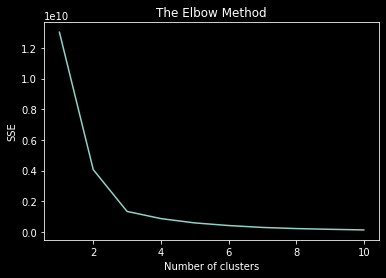

In [1669]:
from sklearn.cluster import KMeans #import KMeans
wcss = [] #a new empty list is to be created as y is not present
for i in range(1, 11): # to identify clusters to be taken in x axis
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)#each cluster check the y value
  #initializing kmeans ++ = initial we need to put the position of random points
  kmeans.fit(X)#fit train data set of x value
  wcss.append(kmeans.inertia_)#sse values is stored in wcss
#kmeans inertia helps to find SSE values
plt.plot(range(1,11), wcss) #plot graph
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [1670]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0) #taking 4,as infered from elbow method
y_kmeans = kmeans.fit_predict(X) #fit predict
y_kmeans #print

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)

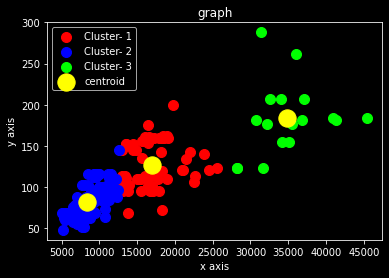

In [1671]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster- 1')
# [y_kmeans==cluster number , column number ] s= number of points
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster- 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'lime', label = 'Cluster- 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = "centroid")
plt.title('graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.show()

# **Plotting**

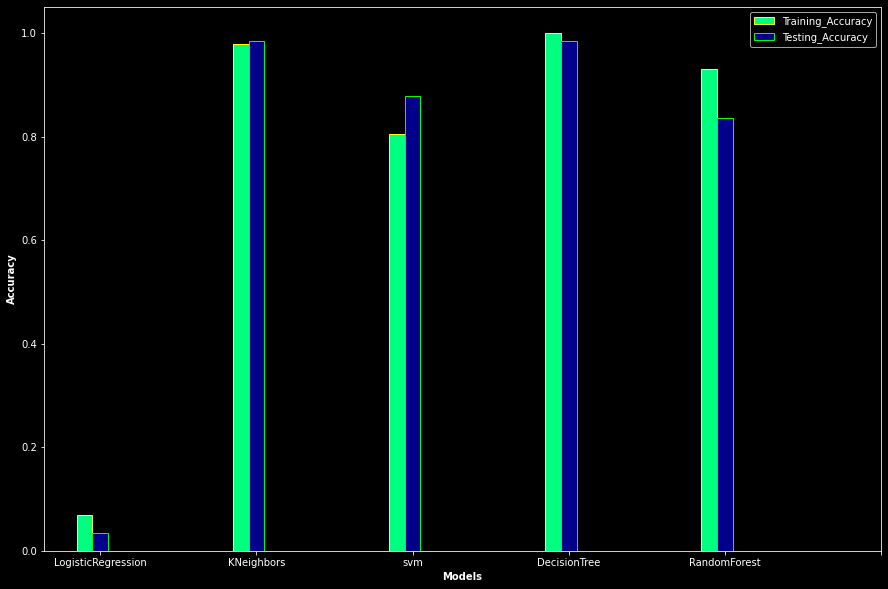

In [1673]:
plt.style.use('dark_background') #ploting with bg color black
# set width of bar
barWidth = 0.10
# set height of bar
fig = plt.gcf();
fig.set_facecolor("black")
fig.set_size_inches(15,10);
# Set position of bar on X axis
r1 = np.arange(len(Training_Accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Make the plot
plt.bar(r1,Training_Accuracy, color='springgreen', width=barWidth, edgecolor='yellow', label='Training_Accuracy')
plt.bar(r2,Testing_Accuracy, color='darkblue', width=barWidth, edgecolor='lime', label='Testing_Accuracy')
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Training_Accuracy)+1)], model)
# Create legend & Show graphic
plt.legend() #shows legends or markings of graph
plt.show()#show barplot